In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Logistic Regression with Log Loss

In [2]:
class LogisticRegressionLogLoss:
    def __init__(self, eta:float, iter:int, weights:int|None, bias:int):
        self.eta=eta
        self.iter=iter
        self.bias=bias
        self.weights=weights
        self.err=[]

    def sigmoid(self, z: np.array)->np.array:
        return 1/(1+np.e**-z)
    
    def fit(self, x: np.array, y: np.array)->None:
        n_sample, n_feat=x.shape
        self.weights=np.zeros(n_feat)

        for _ in range(self.iter):
            z:np.array=np.dot(x, self.weights)+self.bias
            y_pred:np.array=self.sigmoid(z)
            self.err.append((np.sum(y_pred-y)**2))
            dw:np.array=(1/n_sample)*np.dot(x.T, y_pred-y)
            db:float=(1/n_sample)*np.sum(y_pred-y)

            self.weights-=self.eta*dw
            self.bias-=self.eta*db

    def predict(self, x: np.array)-> np.array:
        z:np.array=np.dot(x, self.weights)+self.bias
        y_pred:np.array=self.sigmoid(z)
        return np.array([1 if p > 0.5 else 0 for p in y_pred])


### Logistic Regression MSE

In [3]:
class LogisticRegressionMSE:
    def __init__(self, eta:float, iter:int, weights:None, bias:float):
        self.eta=eta
        self.iter=iter
        self.bias=bias
        self.weights=weights

    def sigmoid(self, z: np.array)->np.array:
        return 1/(1+np.e**-z)
    
    def fit(self, x: np.array, y: np.array)->None:
        n_sample, n_feat=x.shape
        self.weights=np.zeros(n_feat)

        for _ in range(self.iter):
            z:np.array=np.dot(x, self.weights)+self.bias
            y_pred:np.array=self.sigmoid(z)

            dw:np.array=(1/n_sample)*np.dot(x.T, (y_pred*(1-y_pred)*(y_pred-y)))
            db:float=(1/n_sample)*np.sum(y_pred*(1-y_pred)*(y_pred-y))

            self.weights-=self.eta*dw
            self.bias-=self.eta*db

    def predict(self, x: np.array)-> np.array:
        z:np.array=np.dot(x, self.weights)+self.bias
        y_pred:np.array=self.sigmoid(z)
        return np.array([1 if p > 0.5 else 0 for p in y_pred])


In [4]:
x=np.arange(8)
x=x.reshape((len(x), 1))
y=np.array([0, 0, 0, 0, 1, 1, 1, 1])

In [5]:
reg0=LogisticRegressionLogLoss(0.1, 1000, None, 0)
reg0.fit(x, y)

In [6]:
reg1=LogisticRegressionMSE(0.1, 1000, None, 0)
reg1.fit(x, y)

In [7]:
print("Predictions", reg0.predict(x))

Predictions [0 0 0 0 1 1 1 1]


In [8]:
print("Predictions", reg1.predict(x))

Predictions [0 0 0 0 1 1 1 1]


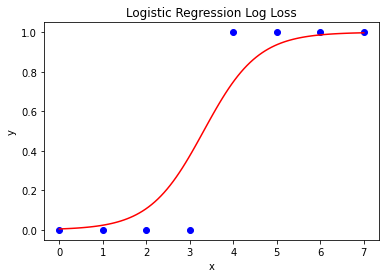

In [9]:
plt.scatter(x, y, color="blue")
plt.xlabel('x')
plt.ylabel('y')
px = np.linspace(np.min(x), np.max(x), 100).reshape(-1, 1)
py=np.dot(px, reg0.weights)+reg0.bias
plt.plot(px, reg0.sigmoid(py), color="red")
plt.title("Logistic Regression Log Loss")
plt.show()

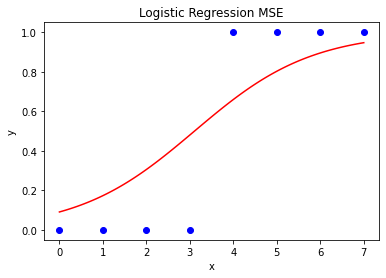

In [10]:
plt.scatter(x, y, color="blue")
plt.xlabel('x')
plt.ylabel('y')
px = np.linspace(np.min(x), np.max(x), 100).reshape(-1, 1)
py=np.dot(px, reg1.weights)+reg1.bias
plt.plot(px, reg1.sigmoid(py), color="red")
plt.title("Logistic Regression MSE")
plt.show()

In [11]:
def log_loss_err(y_pred: np.array, y: np.array)->float:
    return np.sum(-y*np.log(y_pred)-(1-y)*np.log(1-y_pred))

def mse(y_pred: np.array, y: np.array)->float:
    return 0.5*np.sum((y-y_pred)**2)

def sigmoid(z: float):
    return 1/(1+np.e**-z)

err_lg, err_mse, px, py=[], [], [], []
for w in np.arange(-5, 5, 0.1):
    for b in np.arange(-5, 5, 0.1):
        px.append(w)
        py.append(b)
        z=w*x+b
        y_p=sigmoid(z)
        err_lg.append(log_loss_err(y_p, y))
        err_mse.append(mse(y_p, y))

px=np.array(px)
py=np.array(py)
err_lg=np.array(err_lg)
err_mse=np.array(err_mse)


/tmp/ipykernel_11223/723322061.py:2: RuntimeWarning: divide by zero encountered in log
  return np.sum(-y*np.log(y_pred)-(1-y)*np.log(1-y_pred))
/tmp/ipykernel_11223/723322061.py:2: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-y*np.log(y_pred)-(1-y)*np.log(1-y_pred))


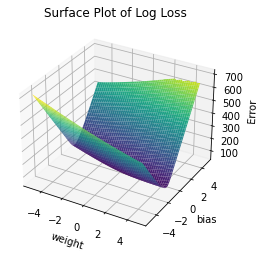

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
px_grid, py_grid = np.meshgrid(np.unique(px), np.unique(py))
err_lg_grid = err_lg.reshape(px_grid.shape)
ax.set_xlabel("weight")
ax.set_ylabel("bias")
ax.set_zlabel("Error")
plt.title('Surface Plot of Log Loss')
surf = ax.plot_surface(px_grid, py_grid, err_lg_grid, cmap='viridis')

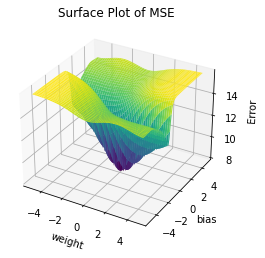

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
err_mse_grid = err_mse.reshape(px_grid.shape)
ax.set_xlabel("weight")
ax.set_ylabel("bias")
ax.set_zlabel("Error")
plt.title('Surface Plot of MSE')
surf = ax.plot_surface(px_grid, py_grid, err_mse_grid, cmap='viridis')

Desision tree ID3 4.5 CART , naive bayes classifier, comapre mse and log loss function(Done), 
2. Check the convexity of least square error function by changing the weights while data remains same.